## PM1 - Clustering and regression with correlated high dimension data

This noteook has two main exercises:

### Exercise 1: K-means clustering in scikit-learn
* Apply k-means to find clusters in the synthetic drilling data and the Octane dataset.  If you wish to you can try doing this in the original high dimension dataset, but this will fail.  Instead try using the first few principal components that you've found in the previous example.

### Exercise 2: Principal Components Regression
* Train a linear regression model (least squares or robust, and using either Seaborn or scikit-learn - try them all if you'd like to!) on the drilling or Octane datasets.  You cannot use the datasets at their full dimension because there are less observations than there are features (in the original feature space)!  But you'll likely find that you train a model based on the PC-transformed features.  Use the code from the last two sessions to do this.  You can start simple - Try to predict quartz based on the first PC, try the same with Octane.  Then build on this as you become more confident and ambitious! 

Also, see if you can find out how to use scikit-learn pipelines to implement this as a pipeline with a transform, followed by a linear regression.  You may find the [pm1-linear-models](../../05-simple-predictions/notebooks/pm1-linear-models-II_filled.ipynb) useful to review.

## Exercise 1: K-means clustering in scikit-learn

The k-means algorithm searches for clusters in an unlabelled multidimensional (low-dimension) dataset.  If your dataset is high dimensional then you'll need to reduce the dimension, using, for example, principal components.

K-means clustering assumes that the centre of a cluster should be the mean average of all of the points belonging to the cluster. The algorithm relies on the assumption that each point should be closer to its own cluster's centre than to any other cluster centre.  This has many of the characteristics (and flaws) of the linear models we've been looking at over the last couple of weeks.  That said, it's often worth trying before moving to more sophisticated approaches.

You can also easily find information on how to use k-means in scikit-learn through internet searches, but lets use a textbook example, then try applying this to another dataset.

Explore the other objects and methods in sklearn.cluster.

Start by importing the necessary packages we will be using and creating some example data to work with using the ```make_blobs``` command in scikit-learns datasets module.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                      cluster_std=0.60, random_state=0)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Let's start by applying K-means clustering to the data. The main function we will be using is ```KMeans```

```from sklearn.cluster import KMeans```

Have a look at the documentation and
1. Create a KMeans model instance with 4 clusters
2. Fit the model using the explanatoary variables (X)
3. Predict the cluster means

In [2]:
from sklearn.cluster import KMeans
# 1. Create a KMeans model instance with 4 clusters
kmodel = KMeans(n_clusters=4)

In [3]:
# 2. Fit the model using the explanatoary variables (X) we want to cluster
kmodel.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
# 3. Predict the cluster means
y_kmeans = kmodel.predict(X)

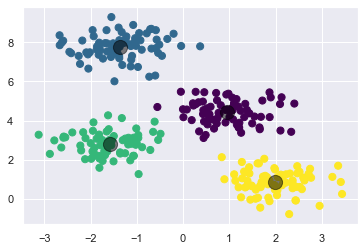

In [5]:
# Have a look at y_kmeans.  It has assigned a cluster number to each observation.
plt.scatter(X[:, 0], X[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmodel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

That worked well!

Before we move on let's take a moment and reflect on *how easy that was to implement* now that we are familiar with the scikit-learn API.

### Exploring a random state

Before we move on, let's take a moment to explore how the initial centroid locations are selected. Create a second `KMeans` model instance with the following parameters:
```
n_clusters=4, init='random',n_init=1, max_iter=1
```
Take a look at the docs to see what these extra parameters are controlling. Essentially, we are going to look at the initialization of cluster locations by setting the number of iterations to 1.

Copy and paste your code from above into 1 cell below (for ease of running multiple times) that will:

1. Create a KMeans model instance with 4 clusters
2. Fit the model using the explanatoary variables (X) we want to cluster
3. Predict the cluster means
4. Plot the data and k-means cluster centers

array([[ 1.99806559,  0.85056928],
       [-0.30968109,  3.61508269],
       [-1.24745266,  8.59465076],
       [-1.40469181,  7.5434482 ]])

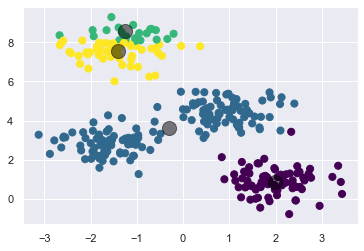

In [6]:
kmodel2 = KMeans(n_clusters=4, init='random',n_init=1, max_iter=1, random_state=42)
kmodel2.fit(X)
y_kmeans2 = kmodel2.predict(X)
plt.scatter(X[:, 0], X[:,1], c=y_kmeans2, s=50, cmap='viridis')
centers2 = kmodel2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5);
centers2

Run the above code block a few times. Do the initial cluster centre locations change? They should.

The `init='random'` parameter is telling the algorithm to randomly select the data points to initially use as cluster centers. Change the `init` parameter to `init=k-means++` and rerun the code block a few times. Do the initial cluster centre locations change? They should, but in a less extreme manner. While the `k-means++` is using a smarter way to select the starting locations, there is still some use of a random *seed* to select points used for the calculation.

The use of *random* numbers is pretty common, and we have used a random number generator in previous examples though it may not have been obvious. The use of random selection can be useful and helpful at times, however just as in laboratory experiments, the idea of *reproducibility* in our data experiments is important.

If we want to share code and be able to produce the same results as a collegue so we have consistent plots or data, we can ensure that our random numbers are consistent by using the same *seed* to tell our random number generators to generate the same random numbers. To do this, *set the seed* to 42 by using the parameter `random_state=42` in the `KMeans` model instance. Rerun the code block a few times. Are the centres the same? They should be.

Okay, enough with random tangents. Now let's combine PCA and clustering...

### Example 1: K-means clustering of principal components

Now try this with some of the clusters that we observed this morning.

Firstly, let's try this with the synthetic drilling data, after transformation with PC1 and PC2.

In [7]:
# import the packages we will use
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from regression_help import create_composition_dataframe, create_observations, create_templates_matrix

Refer back to the notebooks this morning to generate templates and observations

In [8]:
# Create the templates as per the morning
templates = create_templates_matrix()
# Create 150 sets of ground truth assays
compositions = create_composition_dataframe(150)
# Use the templates and ground truth to create synthetic observations
observations = create_observations(compositions, templates)
# Transpose them to put observations into tidy data format
transposed_observations = observations.transpose()

Next, create a PCA instance and compute (fit) the PCA

In [9]:
pca = PCA(n_components=5)
# Fit the PCA model
pca.fit(transposed_observations)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Transform the observations to get the 'scores' in the PCA space

In [10]:
scores = pca.transform(transposed_observations)

Pull out PC1 and PC2, and put this in our features matrix (X), so that we can apply k-means clustering to them

In [11]:
X = scores[:, [0,1]]

The next three lines of code should:
1. Create a KMeans instance with 3 clusters
2. Calculate (fit) the clusters
3. Predict the cluster labels using the first two principle components

In [12]:
clustering_model = KMeans(n_clusters=3)
clustering_model.fit(X)
cluster_labels = clustering_model.predict(X)

Lastly, plot PC1 and PC2 with the k-means predicted cluster labels and cluster centres

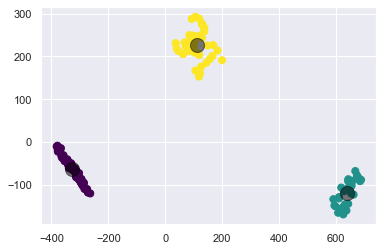

In [13]:
cluster_labels = clustering_model.predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster_labels, s=50, cmap='viridis')
cluster_centres = clustering_model.cluster_centers_
plt.scatter(cluster_centres[:, 0], cluster_centres[:, 1], c='black', s=200, alpha=0.5);

How does that look? Is it what you expected to see?

### Example 2: K-means clustering of principal components

Let's try the same with the Octane data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Read in the octane data like we did this morning.

Keep the Octane number in another variable, call it ```octane_assays``` because we are going to use it for regression in the next activity.

In [15]:
octane_dataframe = pd.read_excel('../data/octane.xlsx')

In [16]:
octane_assays = octane_dataframe['Octane number']

In [17]:
# Now go ahead and drop these
octane_dataframe = \
    octane_dataframe.drop(columns=['Sample name', 'Octane number'])

Next put four lines of code here to:
1. Pull the observation values out of the dataframe
2. Create a PCA instance (with 25 components)
3. Fit the PCA model
4. Transform the observations into PCA space

In [18]:
observations = octane_dataframe.values
pca = PCA(n_components=25)
pca.fit(observations)
scores = pca.transform(observations)

The next four lines of code should:
1. Pull out PC1 and PC2, and put this in our features matrix (X)
2. Create a KMeans instance with 2 clusters
3. Calculate (fit) the clusters
4. Predict the cluster labels using the first two principle components

In [19]:
X = scores[:, [0,1]]
clustering_model = KMeans(n_clusters=2)
clustering_model.fit(X)
cluster_labels = clustering_model.predict(X)

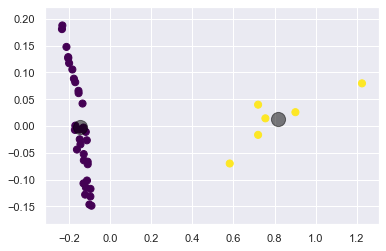

In [20]:
plt.scatter(X[:,0], X[:,1], c=cluster_labels, s=50, cmap='viridis')
cluster_centres = clustering_model.cluster_centers_
plt.scatter(cluster_centres[:, 0], cluster_centres[:, 1], c='black', s=200, alpha=0.5);

This is similar to what we did in the morning, but k-means has semi-automatically found the inlier and outlier groups in Octane.  This is reasonable as is, if we knew beforehand that observations are likely to be in one of two groups.

In [21]:
# Lets use the cluster labels to split the observations
# into inliers and outliers.  We could use
# clustering_model.predict to classify new observations
# into the inlier or outlier groups.  If we're making
# a regression model then we could choose to report
# a gross deviation from normal operation if the
# new observation is assigned to the outlier group
# and we could make an octane prediction if it fits
# into the inlier group.

inlier_indices = np.where((cluster_labels == 0))[0]
outlier_indices = np.where ((cluster_labels == 1))[0]
inliers = observations[inlier_indices]
outliers = observations[outlier_indices]

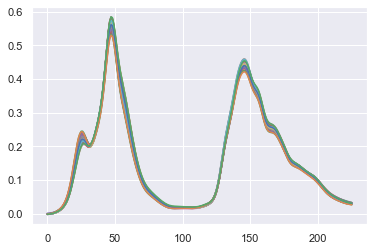

In [22]:
# How do the inliers look?
fig, ax = plt.subplots(1,1)
for idx in inlier_indices:
    plt.plot(observations[idx])

## Exercise 2: Principal Components Regression

This is something you can fully implement with what you already know.  First find the principal components and create a linear regression model that predicts octane based using the principal component scores as the features.  Plot predicted octane against assay octane and look at the R^2 and the residuals.

This is a real industrial application.  There is a an expensive and slow analytical process for measuring the octane rating of petrol, but it's not useful for production, where it's desirable that we have continuous and cheap online monitoring of octane rating as hydrocarbons are blended together.  To achieve this infrared spectroscopy is used and a model is constructed that relates octane rating to the observed spectra.  Once the model is created and validated it is used to predict octane rating continuously and cheaply.

By using principal components we can make a predictive model with hundreds of observed variables and only ~30 observations.  This is impossible with linear least squares.

In [23]:
# Let's try to find a linear model that relates octane rating to the principal
# components of the spectra.  We'll take out the outliers first.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

Complete the function below by importing the Octane dataset using pandas

In [24]:
def get_octane_observations_and_assays(inlier_indices):
    octane_dataframe = pd.read_excel('../data/octane.xlsx')
    octane_assays = octane_dataframe['Octane number'][inlier_indices]

    octane_dataframe = \
        octane_dataframe.drop(columns=['Sample name', 'Octane number'])
    observations = octane_dataframe.values[inlier_indices]
    return observations, octane_assays

Complete the function below by:
1. Create a PCA model instance with ```number_of_components```
2. Fit the PCA model
3. Transform the observations into PCA space
4. Create a ```LinearRegression``` model instance
5. Fit regression model
6. Predict using features matrix (i.e PCA scores)

In [25]:
def build_model(number_of_components):
    observations, assays = get_octane_observations_and_assays(inlier_indices)
    pca = PCA(n_components=number_of_components) # 1. PCA model instance 
    pca.fit(observations) #2. Fit PCA model
    scores = pca.transform(observations) #3. Transform into PCA space

    model = LinearRegression(fit_intercept=True) #4. LinearRegression model instance
    features_matrix = scores[:,:]
    target_array = assays
    model.fit(features_matrix, target_array) #5. Fit regression model
    print('Model R^2 is ',model.score(features_matrix, target_array))
    predicted_octane = model.predict(features_matrix) #6. Predict using features
    plt.scatter(assays, predicted_octane)
    
    plt.xlabel('Octane Rating Assay')
    plt.ylabel('Octane Rating Predicted')

Model R^2 is  0.7519080989910976


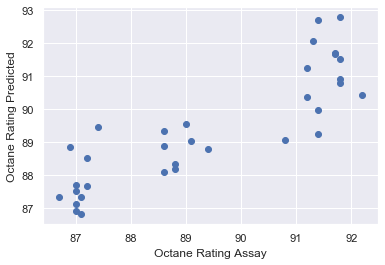

In [26]:
# The parameter 1 specifies that we're building a model using just the first principal component.  This is what we get
# if we try to find a univariate linear relationship between the first principal component scores and octane rating.
build_model(1)

Based on just PC1 there is an approximate linear relationship, but it looks like there is unmodelled non-gaussian error present.  The relationship may be improved by including additional PCs.  Try building the model with the first two PCs.

Model R^2 is  0.9797636204100757


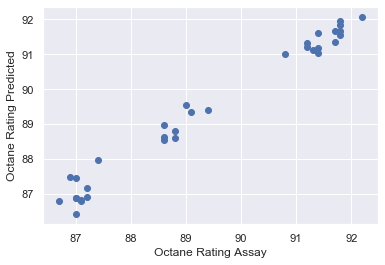

In [27]:
build_model(2)

Will the predictions improve if we consider 4 principal components?

Model R^2 is  0.9830061930270496


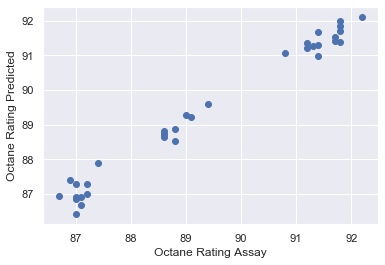

In [28]:
build_model(4)

Model R^2 is  0.9987879424006761


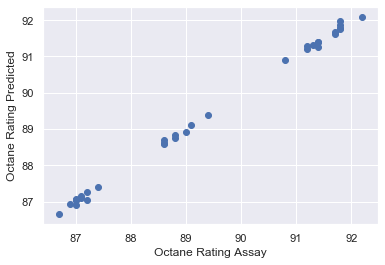

In [29]:
# What if we include 25 principal components?
build_model(25)

When we use 25 components we have a very tight fit, but we are likely overfitting the model to the training data that we have.  We need a way to choose the optimium number of components to use such that we're not overfitting the model, but we still have good predictive power.  We saw this demonstrated in the logistic regression model last time.  Let's look at it in the context of fitting a general linear model (in this case with the "parts" made of polynomial terms) to a function similar to the metal recovery vs sulphur data.

### Model validation revisited

Let's use cross validation to fit a polynomial model to the metal recovery dataset, and determine the degree.  This is analogous to hyperparameter selection that will be used for other scikit-learn models.

We will use functions to make coding this more compact. The first is a function to perform the polynomial regression using a scikit-learn pipeline.

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

We will also have a function to generate data.

In [31]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1)**2
    y = 10 - 1.0 / (X.ravel()+0.1)
    if err > 0:
        y+= err * rng.randn(N)
    return X, y

In [32]:
# Create N=50 data
X, y = make_data(50)

Apply polynomial regression to the using three different degrees and plot the results

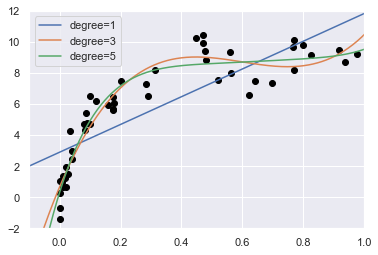

In [33]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color = 'black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

Last time, we looked at two scikit-learn methods to examine model scores. This time, let's use the ```validation_curve``` in ```sklearn.model_selection``` to generate model scores for a range of polynomial degrees.

In [34]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)

In [35]:
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 
                                         'polynomialfeatures__degree',
                                         degree, cv=7)

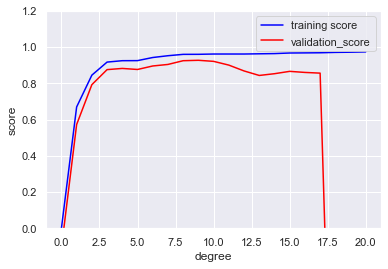

In [36]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation_score')
plt.legend(loc='best')
plt.ylim(0, 1.2)
plt.xlabel('degree')
plt.ylabel('score');

### Learning Curves

The optimal model will usually depend on how much training data you have.  Learning curves are a tool to identify when a model will be improved by more data, or whether it's already about as good as it will get (though a different kind of model may still work better). Let's create more data and compare with the validation curves in the example above.

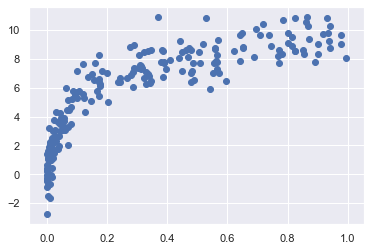

In [37]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

In [38]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree',
                                            degree, cv=7)

(0, 1)

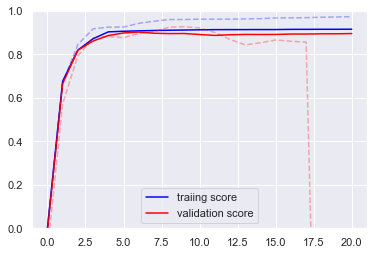

In [39]:
plt.plot(degree, np.median(train_score2, 1), color='blue',
        label='traiing score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,
         linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,
        linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)

Learning Curves behave like this:

* A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.

* A model of a given complexity will underfit a large dataset: this means that the training score will decrease, but the validation score will increase.

* A model will never, except by chance or a mistake in your code, give a better score to the validation set then the training set: this means the curves should keep getting closer together, but never cross.

* This all implies that if a model is being overfitted, then the behaviour may improve if you increase the size of the training set.  This is a reason why neural network models, with their high complexity, require lots of training data to behave well.  Conversely, when the training and validation curves have converged then you don't need to spend time, energy or money collecting more data (unless you intend to bring in a higher complexity model in future).


### Building a cross-validated Principal Component Regression (PCR) model

Lets apply this to the principal components model that we've been developing, which looks promising but may be overfitting if we choose to include too many components.  Unfortunately PCR isn't built in to scikit-learn so creating the learning curve like above is complicated.

We can apply cross-validation to PCR (similar to how we did last time) and see how cross validated scores vary with the number of components.

Use the function `get_octane_observations_and_assays` to create the data and the scikit-learn `pipeline`. The pipeline should have both a `LinearRegression` and `PCA` model instance.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

X, y = get_octane_observations_and_assays(inlier_indices)

regression = LinearRegression(fit_intercept=True)
components_to_test = np.arange(1,25)
component_scores = []
for component in components_to_test:
    pca = PCA(n_components=component)
    pipe = Pipeline(steps=[('pca', pca), ('regression', regression)])
    component_scores.append(cross_val_score(estimator=pipe,
                                           X=X, y=y).mean())

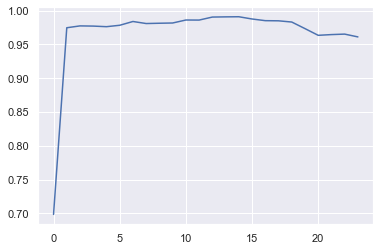

In [41]:
plt.plot(component_scores)

The relationship between error in prediction of octane rating and the number of components isn't simple.  This is partly because principal components aims to answer the question of how best to explain as much variance as possible in the X data in as few components as possible.  This is not the same question as how to find the fewest components that can best predict octane rating.  The latter question is closer to what PLS tries to answer.  This will be explored further soon.

The plot above suggests that a good model PCR may be found with four components (being where the first local minimum appears, and because there is little substantial improvement in R^2 after that), and that additional components may be overfitting.